In [232]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
cols = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholerstoral', 'FastingBloodSugar', 'restecg', 'MaxHeartRate', 'ExInducedAngina', 'oldpeak', 'slope', 'MajorVessels', 'ThaliumStressResult', 'target']
df = pd.read_csv('../data/processed.cleveland.data', names=cols, header=None)

In [234]:
df.head(20)

,Age,Sex,ChestPainType,RestingBloodPressure,Cholerstoral,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    float64
 1   Sex                   303 non-null    float64
 2   ChestPainType         303 non-null    float64
 3   RestingBloodPressure  303 non-null    float64
 4   Cholerstoral          303 non-null    float64
 5   FastingBloodSugar     303 non-null    float64
 6   restecg               303 non-null    float64
 7   MaxHeartRate          303 non-null    float64
 8   ExInducedAngina       303 non-null    float64
 9   oldpeak               303 non-null    float64
 10  slope                 303 non-null    float64
 11  MajorVessels          303 non-null    object 
 12  ThaliumStressResult   303 non-null    object 
 13  target                303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [236]:
df.replace('?', np.nan, inplace=True)
df.head(20)

,Age,Sex,ChestPainType,RestingBloodPressure,Cholerstoral,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [237]:
df.isna().sum()

Age                     0
Sex                     0
ChestPainType           0
RestingBloodPressure    0
Cholerstoral            0
FastingBloodSugar       0
restecg                 0
MaxHeartRate            0
ExInducedAngina         0
oldpeak                 0
slope                   0
MajorVessels            4
ThaliumStressResult     2
target                  0
dtype: int64

In [238]:
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    float64
 1   Sex                   303 non-null    float64
 2   ChestPainType         303 non-null    float64
 3   RestingBloodPressure  303 non-null    float64
 4   Cholerstoral          303 non-null    float64
 5   FastingBloodSugar     303 non-null    float64
 6   restecg               303 non-null    float64
 7   MaxHeartRate          303 non-null    float64
 8   ExInducedAngina       303 non-null    float64
 9   oldpeak               303 non-null    float64
 10  slope                 303 non-null    float64
 11  MajorVessels          299 non-null    float64
 12  ThaliumStressResult   301 non-null    float64
 13  target                303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [240]:
df.fillna(df.median(), inplace=True)
df.head(20)

,Age,Sex,ChestPainType,RestingBloodPressure,Cholerstoral,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [241]:
df.isna().sum()

Age                     0
Sex                     0
ChestPainType           0
RestingBloodPressure    0
Cholerstoral            0
FastingBloodSugar       0
restecg                 0
MaxHeartRate            0
ExInducedAngina         0
oldpeak                 0
slope                   0
MajorVessels            0
ThaliumStressResult     0
target                  0
dtype: int64

In [242]:
df.duplicated().sum()

np.int64(0)

In [243]:
num_cols = ['Age', 'RestingBloodPressure', 'Cholerstoral', 'MaxHeartRate', 'oldpeak']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholerstoral,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,target
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,1.087338,3.0,0.0,6.0,0
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,0.397182,2.0,3.0,3.0,2
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,1.346147,2.0,2.0,7.0,1
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,2.122573,3.0,0.0,3.0,0
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,0.310912,1.0,0.0,3.0,0


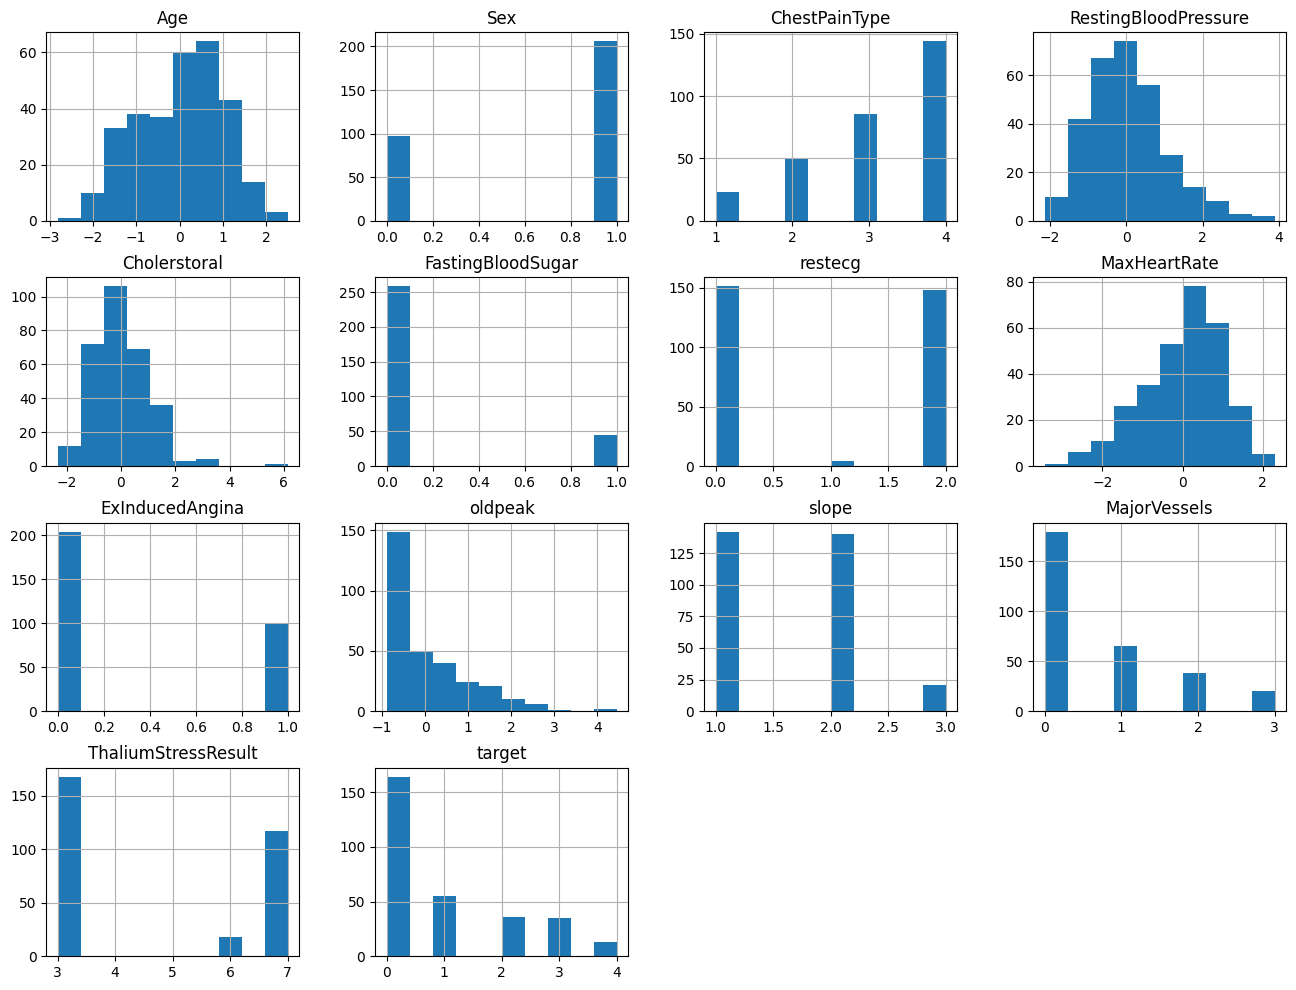

In [244]:
df.hist(figsize=(16,12))
plt.show()

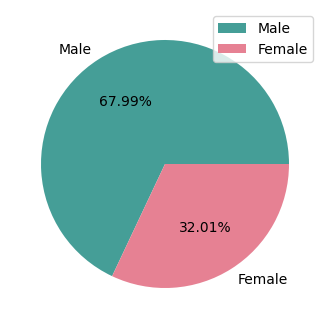

In [245]:
labels = ['Male', 'Female']
sex = df['Sex'].value_counts()
plt.figure(figsize=(4,8))
plt.pie(sex, labels = labels, autopct = '%1.2f%%', colors=['#459e97', '#e68193'])
plt.legend()
plt.show()

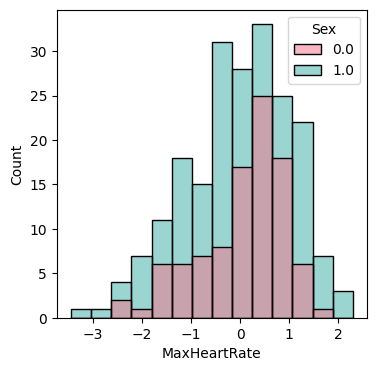

In [246]:
plt.figure(figsize=(4,4))
sns.histplot(x = 'MaxHeartRate', data=df, hue='Sex', palette='husl')
plt.show()

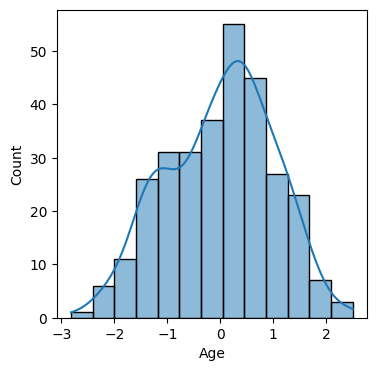

In [247]:
plt.figure(figsize=(4,4))
sns.histplot(df.Age, kde=True)
plt.show()

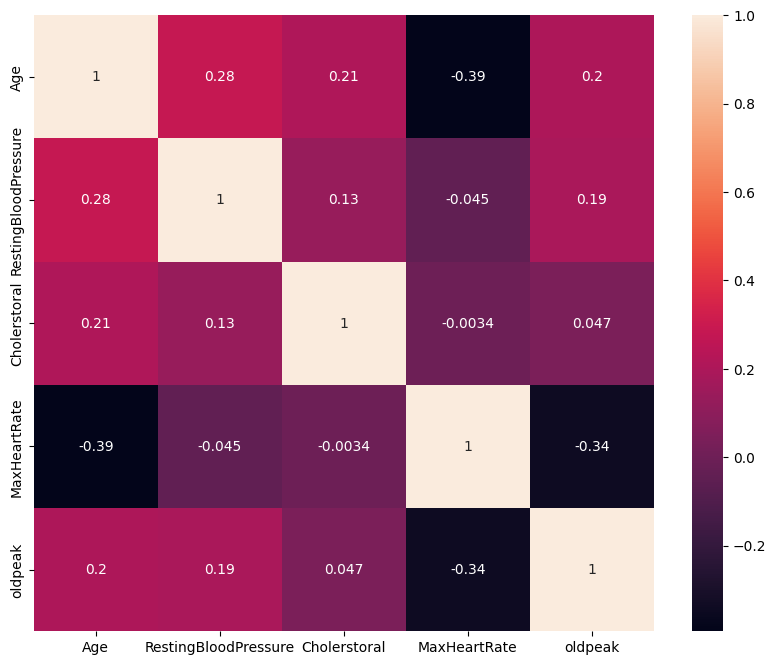

In [248]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), yticklabels="auto", annot=True)
plt.show()

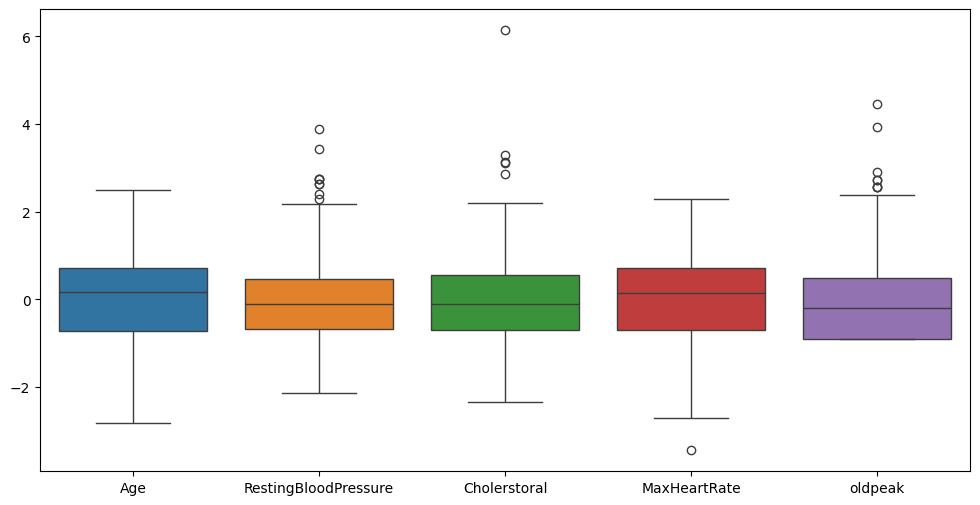

In [249]:
figure, axis = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.show()

In [250]:
df.to_csv('../data/heart_disease.csv', index=False)